In [1]:
# imports
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#import datetime as dt
#import scipy.stats as st
#from pandas_profiling import ProfileReport
#import missingno as msno

# Extract & Load

In [2]:
csv_path = './data/'

In [3]:
def get_data(csv_path):
    file_names = [x for x in os.listdir(csv_path) if ".csv" in x]
    # file_names_base = file_names
    key_names = [
        key_name.removesuffix('.csv').removeprefix('EdStats')
        for key_name in file_names
    ]

    data_dict = {}
    for k, f in zip(key_names, file_names):
        data_dict[k] = pd.read_csv(os.path.join(csv_path, f))

    return data_dict

In [4]:
data = get_data(csv_path)

# Assess Dataset

## Fct build 

In [5]:
ls -lh ./data

total 354M
-rw-r--r-- 1 dgaillot dgaillot 488K Jan 28 14:47 data_OCED_min.csv
-rw-r--r-- 1 dgaillot dgaillot 137K Jan 22  2018 EdStatsCountry.csv
-rw-r--r-- 1 dgaillot dgaillot  48K Jan 22  2018 EdStatsCountry-Series.csv
-rw-r--r-- 1 dgaillot dgaillot 312M Jan 22  2018 EdStatsData.csv
-rw-r--r-- 1 dgaillot dgaillot  38M Jan 22  2018 EdStatsFootNote.csv
-rw-r--r-- 1 dgaillot dgaillot 3.6M Jan 22  2018 EdStatsSeries.csv


In [6]:
import enum
from os import listdir
from os.path import isfile, join

class SIZE_UNIT(enum.Enum):
   BYTES = 1
   KB = 2
   MB = 3
   GB = 4

def convert_unit(size_in_bytes, unit):
  # Convert the size from bytes to other units like KB, MB or GB
   if unit == SIZE_UNIT.KB:
       return size_in_bytes/1024
   elif unit == SIZE_UNIT.MB:
       return size_in_bytes/(1024*1024)
   elif unit == SIZE_UNIT.GB:
       return size_in_bytes/(1024*1024*1024)
   else:
       return size_in_bytes

def get_file_size(file_name, size_type = SIZE_UNIT.BYTES ):
   # Get file in size in given unit like KB, MB or GB
   size = os.path.getsize(file_name)
   return convert_unit(size, size_type)

def get_folder_files_size(folder_path):
    files_list = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]
    for i in files_list:
        size = get_file_size(f'{folder_path + i}', SIZE_UNIT.MB)
        print(f'Size of {i}: ', round(size,2),'MB')

In [7]:
def get_shape(dict):
    for key in dict:
        print(key, dict[f'{key}'].shape)

In [8]:
data.keys()

dict_keys(['Country-Series', 'Country', 'FootNote', 'Series', 'data_OCED_min', 'Data'])

In [9]:
data['Data'].nunique()

Country Name        242
Country Code        242
Indicator Name     3665
Indicator Code     3665
1970              24595
                  ...  
2085               7335
2090               7150
2095               7044
2100               6914
Unnamed: 69           0
Length: 70, dtype: int64

## Cardinality

### Files size & shape

In [10]:
get_folder_files_size(csv_path)

Size of EdStatsCountry-Series.csv:  0.05 MB
Size of EdStatsCountry.csv:  0.13 MB
Size of EdStatsFootNote.csv:  37.87 MB
Size of EdStatsSeries.csv:  3.54 MB
Size of data_OCED_min.csv:  0.48 MB
Size of EdStatsData.csv:  311.3 MB


In [11]:
get_shape(data)

Country-Series (613, 4)
Country (241, 32)
FootNote (643638, 5)
Series (3665, 21)
data_OCED_min (1210, 71)
Data (886930, 70)


### Main source ('Data' dataset)

In [12]:
data['Data'].columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [13]:
data['Data'].head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [14]:
data['Data'].describe()

1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%    6.317724e+00  6.316240e+01  6.655139e+01  6.969595e+01  7.087760e+01   
75%    6.251250e+01  5.655200e+04  5.863650e+04  6.202900e+04  6.383675e+04   
max    1.903929e+13  1.986457e+13  2.100916e+13  2.238367e+13  2.282991e+13   

               1975          1976          1977          1978          1979  \
count  8.730600e+04  3.748300e+04  3.757400e+04  3.757600e+04  3.680900e+04   
mean   2.314288e+09  5.731808e+09  6.124437e+09  6.671489e+09  7.436724e+09   
std    1.375059e+11  2.215546e+11  2.325489e+11  2.473986e+11  2.660957e+11   
min   -3.658569e+00 -2.950945e+00 -3.174870e+00 -3.558749e+00 -2.973612e+00   
25%    1.400000e+00  9.312615e+00  9.519913e+00  1.000000e+01  1.000000e+01   
50%    9.677420e+00  7.101590e+01  7.133326e+01  7.290512e+01  7.510173e+01   
75%    7.854163e+01  5.682800e+04  5.739175e+04  5.940425e+04  6.411500e+04   
max    2.300634e+13  2.424128e+13  2.521383e+13  2.622101e+13  2.730873e+13   

       ...          2060          2065          2070          2075  \
count  ...  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   ...  7.224868e+02  7.271290e+02  7.283779e+02  7.266484e+02   
std    ...  2.215845e+04  2.287990e+04  2.352338e+04  2.408149e+04   
min    ... -1.630000e+00 -1.440000e+00 -1.260000e+00 -1.090000e+00   
25%    ...  3.000000e-02  3.000000e-02  2.000000e-02  2.000000e-02   
50%    ...  2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01   
75%    ...  7.505000e+00  7.500000e+00  7.300000e+00  7.100000e+00   
max    ...  2.951569e+06  3.070879e+06  3.169711e+06  3.246239e+06   

               2080          2085          2090          2095          2100  \
count  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   7.228327e+02  7.176899e+02  7.113072e+02  7.034274e+02  6.940296e+02   
std    2.455897e+04  2.496587e+04  2.530183e+04  2.556069e+04  2.574189e+04   
min   -9.200000e-01 -7.800000e-01 -6.500000e-01 -5.500000e-01 -4.500000e-01   
25%    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02   
50%    2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01  2.200000e-01   
75%    6.722500e+00  6.080000e+00  5.462500e+00  4.680000e+00  4.032500e+00   
max    3.301586e+06  3.337871e+06  3.354746e+06  3.351887e+06  3.330484e+06   

       Unnamed: 69  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 66 columns]

In [15]:
data['Data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

### Income Groups ('Country' dataset)

In [16]:
data['Country'].head(1)

Country Code Short Name Table Name Long Name 2-alpha code  Currency Unit  \
0          ABW      Aruba      Aruba     Aruba           AW  Aruban florin   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   

  IMF data dissemination standard  Latest population census  \
0                             NaN                      2010   

  Latest household survey Source of most recent Income and expenditure data  \
0                     NaN                                               NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   

  Unnamed: 31  
0         NaN  

[1 rows x 32 columns]

In [17]:
# cherrypick data from data['Country']
country2 = data['Country'][['Country Code','Short Name','Income Group','Region']]
country2.head()

Country Code   Short Name          Income Group                     Region
0          ABW        Aruba  High income: nonOECD  Latin America & Caribbean
1          AFG  Afghanistan            Low income                 South Asia
2          AGO       Angola   Upper middle income         Sub-Saharan Africa
3          ALB      Albania   Upper middle income      Europe & Central Asia
4          AND      Andorra  High income: nonOECD      Europe & Central Asia

In [18]:
# find distribution of different "Income Group"
country2[['Country Code', 'Income Group']].groupby(['Income Group']).count()

Country Code
Income Group                      
High income: OECD               31
High income: nonOECD            44
Low income                      34
Lower middle income             50
Upper middle income             55

In [19]:
country2[['Country Code', 'Region']].groupby(['Region']).count()

Country Code
Region                                  
East Asia & Pacific                   36
Europe & Central Asia                 57
Latin America & Caribbean             41
Middle East & North Africa            21
North America                          3
South Asia                             8
Sub-Saharan Africa                    48

## Missing Data

### Check years/columns nan values

#### Fct : count rows / cols nans, plotting

In [20]:
def get_df_avalaible_values(df):
    indicators_list = df['Indicator Code'].unique()
    available_values_list = []
    
    for i in range(len(indicators_list)):
        indicator_full_data = df.loc[df['Indicator Code'] == indicators_list[i]]
        indicator_years_data = indicator_full_data.loc[:, ~indicator_full_data.columns.isin(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])]
        df_nan_count = indicator_years_data.isna().values.sum()
        df_non_nan_count = indicator_years_data.count().sum()
        available_values_percent = round((df_non_nan_count / (df_non_nan_count + df_nan_count) * 100), 2)
        available_values_list.append(available_values_percent)
        
    
    available_values_df = pd.DataFrame({'Indicator Code':indicators_list,
                                  'percent_available': available_values_list
                                 })   
    return available_values_df

In [21]:
def get_df_columns_na(df):
    counts = df.isna().sum()
    percentages = round(df.isna().mean() * 100, 1)
    null_values = pd.concat([counts, percentages], axis = 1, keys = ["count", "null %"])
    null_values['columns'] = null_values.index
    null_values = null_values[['columns', 'count', 'null %']]
    return null_values

In [22]:
def plot_df_xy(df, x_val, y_val, height_val = 20, width_val = 13):
    sns.catplot(data=df, x= x_val, y= y_val, kind="bar", height=height_val, aspect=width_val/height_val)
    sns.set(rc={'figure.figsize':(width_val,height_val)})
    plt.xticks(rotation=70)
    plt.tight_layout()

#### Check + Plot data['Data'] : years (columns) & indicators (rows)

In [23]:
data['Data'].isna().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64

In [24]:
data_na = get_df_columns_na(data['Data'])
data_na

columns   count  null %
Country Name      Country Name       0     0.0
Country Code      Country Code       0     0.0
Indicator Name  Indicator Name       0     0.0
Indicator Code  Indicator Code       0     0.0
1970                      1970  814642    91.8
...                        ...     ...     ...
2085                      2085  835494    94.2
2090                      2090  835494    94.2
2095                      2095  835494    94.2
2100                      2100  835494    94.2
Unnamed: 69        Unnamed: 69  886930   100.0

[70 rows x 3 columns]

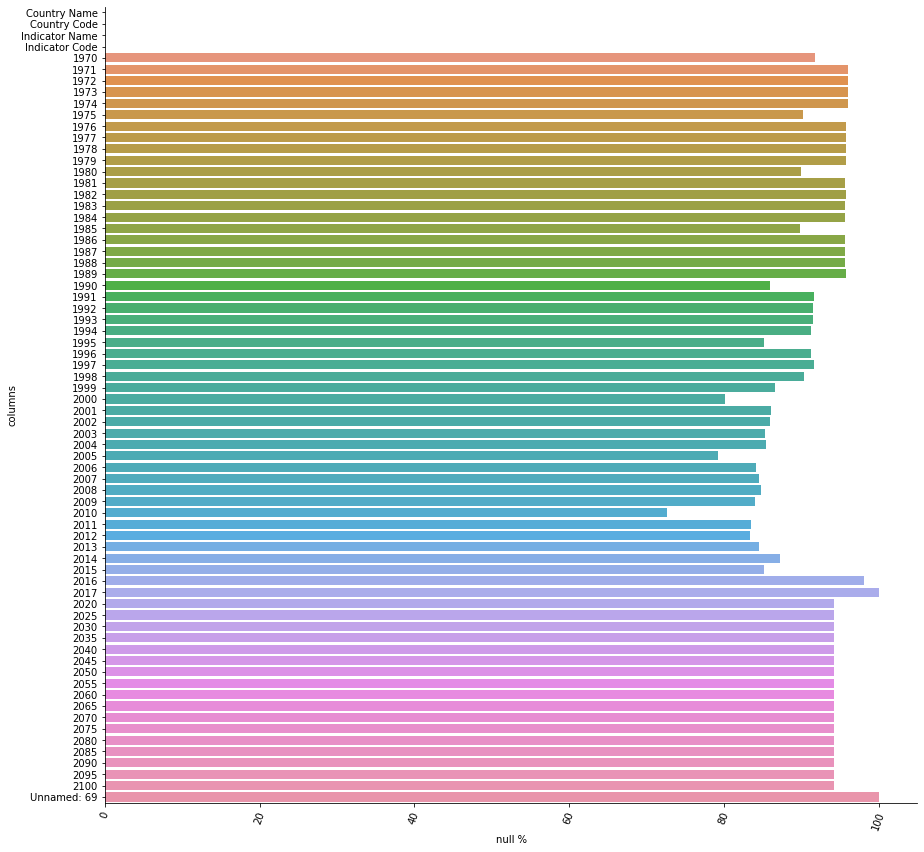

In [25]:
plot_df_xy(data_na, 'null %', 'columns', 12)

In [26]:
available_count = get_df_avalaible_values(data['Data']).sort_values(by='percent_available',ascending=False)
available_count

Indicator Code  percent_available
2533                SP.POP.TOTL              69.84
2307                SP.POP.GROW              69.80
2483          SP.POP.1564.TO.ZS              64.13
2532          SP.POP.TOTL.MA.ZS              64.07
2530          SP.POP.TOTL.FE.ZS              64.07
...                         ...                ...
881     LO.EGRA.LSTN.0.FAN.2GRD               0.01
880     LO.EGRA.LSTN.0.EWE.2GRD               0.01
879     LO.EGRA.LSTN.0.ENG.6GRD               0.01
878     LO.EGRA.LSTN.0.ENG.4GRD               0.01
1038  LO.EGRA.READ.GON.ADV.2GRD               0.01

[3665 rows x 2 columns]

In [27]:
available_count.head(200)

Indicator Code  percent_available
2533        SP.POP.TOTL              69.84
2307        SP.POP.GROW              69.80
2483  SP.POP.1564.TO.ZS              64.13
2532  SP.POP.TOTL.MA.ZS              64.07
2530  SP.POP.TOTL.FE.ZS              64.07
...                 ...                ...
2502  SP.POP.0610.FE.UN              29.98
2375  SP.POP.AG19.MA.UN              29.98
2478  SP.POP.1419.MA.UN              29.98
2481  SP.POP.1524.MA.UN              29.98
2480  SP.POP.1524.FE.UN              29.98

[200 rows x 2 columns]

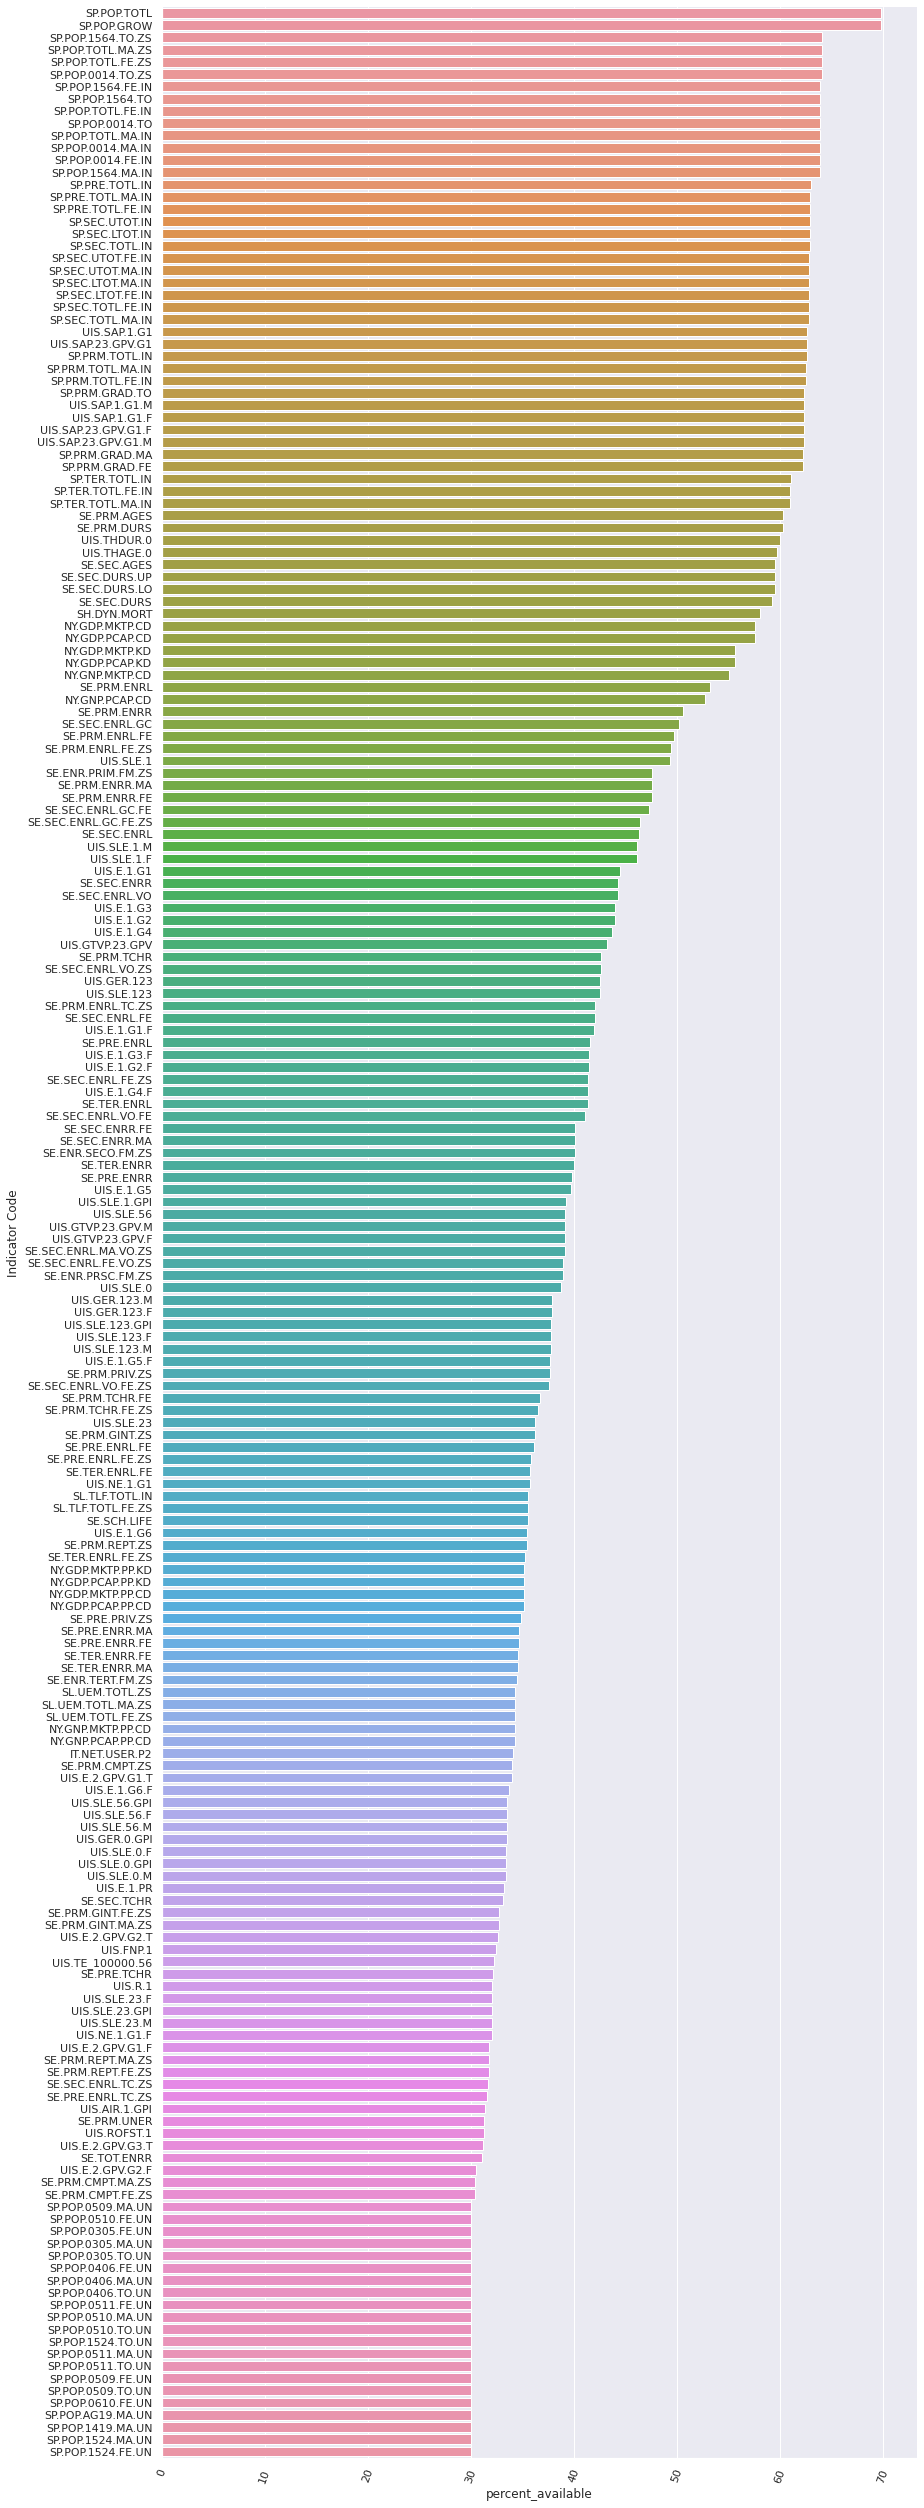

In [28]:
# take top 200 results from dataframe and plot them
plot_df_xy(available_count.head(200), 'percent_available', 'Indicator Code', 35, 13)

### Get indicators with most avalaible data

#### Select top indicators ( >45% available data)

In [29]:
available_count

Indicator Code  percent_available
2533                SP.POP.TOTL              69.84
2307                SP.POP.GROW              69.80
2483          SP.POP.1564.TO.ZS              64.13
2532          SP.POP.TOTL.MA.ZS              64.07
2530          SP.POP.TOTL.FE.ZS              64.07
...                         ...                ...
881     LO.EGRA.LSTN.0.FAN.2GRD               0.01
880     LO.EGRA.LSTN.0.EWE.2GRD               0.01
879     LO.EGRA.LSTN.0.ENG.6GRD               0.01
878     LO.EGRA.LSTN.0.ENG.4GRD               0.01
1038  LO.EGRA.READ.GON.ADV.2GRD               0.01

[3665 rows x 2 columns]

In [30]:
results_top = available_count.loc[available_count['percent_available'] > 45].sort_values(by='percent_available',ascending=False)
results_top.shape

(70, 2)

In [31]:
results_top.head()

Indicator Code  percent_available
2533        SP.POP.TOTL              69.84
2307        SP.POP.GROW              69.80
2483  SP.POP.1564.TO.ZS              64.13
2532  SP.POP.TOTL.MA.ZS              64.07
2530  SP.POP.TOTL.FE.ZS              64.07

In [32]:
# vérifier le taux de null dans les colonnes / années des indicateurs de results_top

## lister indicateurs du top filtré
results_top_col = [results_top['Indicator Code'].unique()][0]

## obtenir data['Data'] avec uniquement indicateurs filtrés
top_data = data['Data'].loc[data['Data']['Indicator Code'].isin(results_top_col)]

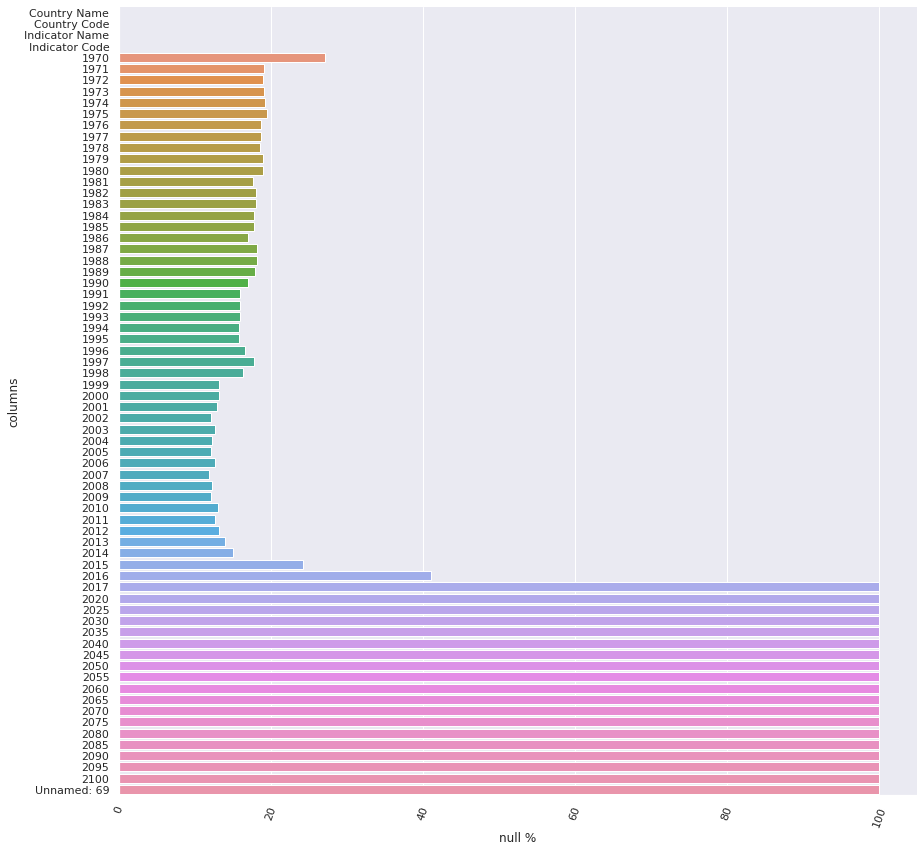

In [33]:
top_data_na = get_df_columns_na(top_data)
plot_df_xy(top_data_na, 'null %', 'columns', 12)

#### Drop empty columns (years)

In [34]:
# find columns with 100% missing values
top_data_high_miss = top_data_na.loc[top_data_na["null %"] >= 100].index

# drop columns with 100% missing values
top_data_2 = top_data.drop(top_data_high_miss, axis = 1)
top_data_2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

In [78]:
top_data_2[['Country Code']]

Country Code
1183            ARB
1184            ARB
1191            ARB
1197            ARB
1198            ARB
1242            ARB
1243            ARB
1244            ARB
1245            ARB
1250            ARB
1251            ARB
1331            ARB
1332            ARB
1333            ARB
1334            ARB
1642            ARB
1681            ARB
1683            ARB
1684            ARB
2035            ARB
2039            ARB
2307            ARB
2311            ARB
2312            ARB
2313            ARB
2317            ARB
2318            ARB
2319            ARB
2320            ARB
2321            ARB
2322            ARB
2323            ARB
2324            ARB
2325            ARB
2326            ARB
2327            ARB
2328            ARB
2329            ARB
2330            ARB
2331            ARB
2332            ARB
2333            ARB
2334            ARB
2335            ARB
2336            ARB
2337            ARB
2338            ARB
2339            ARB
2340            ARB
2419            ARB
2420            ARB
2421            ARB
2422            ARB
2483            ARB
2484            ARB
2485            ARB
2486            ARB
2529            ARB
2530            ARB
2531            ARB
2532            ARB
2533            ARB
2931            ARB
2932            ARB
2934            ARB
2982            ARB
2984            ARB
2985            ARB
2986            ARB
2987            ARB
4848            EAS
4849            EAS
4856            EAS
4862            EAS
4863            EAS
4907            EAS
4908            EAS
4909            EAS
4910            EAS
4915            EAS
4916            EAS
4996            EAS
4997            EAS
4998            EAS
4999            EAS
5307            EAS
5346            EAS
5348            EAS
5349            EAS
5700            EAS
5704            EAS
5972            EAS
5976            EAS
5977            EAS
5978            EAS
5982            EAS
5983            EAS
5984            EAS
5985            EAS
5986            EAS
5987            EAS
5988            EAS
5989            EAS
5990            EAS
5991            EAS
5992            EAS
5993            EAS
5994            EAS
5995            EAS
5996            EAS
5997            EAS
5998            EAS
5999            EAS
6000            EAS
6001            EAS
6002            EAS
6003            EAS
6004            EAS
6005            EAS
6084            EAS
6085            EAS
6086            EAS
6087            EAS
6148            EAS
6149            EAS
6150            EAS
6151            EAS
6194            EAS
6195            EAS
6196            EAS
6197            EAS
6198            EAS
6596            EAS
6597            EAS
6599            EAS
6647            EAS
6649            EAS
6650            EAS
6651            EAS
6652            EAS
8513            EAP
8514            EAP
8521            EAP
8527            EAP
8528            EAP
8572            EAP
8573            EAP
8574            EAP
8575            EAP
8580            EAP
8581            EAP
8661            EAP
8662            EAP
8663            EAP
8664            EAP
8972            EAP
9011            EAP
9013            EAP
9014            EAP
9365            EAP
9369            EAP
9637            EAP
9641            EAP
9642            EAP
9643            EAP
9647            EAP
9648            EAP
9649            EAP
9650            EAP
9651            EAP
9652            EAP
9653            EAP
9654            EAP
9655            EAP
9656            EAP
9657            EAP
9658            EAP
9659            EAP
9660            EAP
9661            EAP
9662            EAP
9663            EAP
9664            EAP
9665            EAP
9666            EAP
9667            EAP
9668            EAP
9669            EAP
9670            EAP
9749            EAP
9750            EAP
9751            EAP
9752            EAP
9813            EAP
9814            EAP
9815            EAP
9816            EAP
9859            EAP
9860            EAP
9861   

In [35]:
values_top_data_2 = get_df_avalaible_values(top_data_2).sort_values(by='percent_available',ascending=False)
values_top_data_2

Indicator Code  percent_available
61           SP.POP.TOTL              98.07
21           SP.POP.GROW              98.02
53     SP.POP.1564.TO.ZS              90.06
49     SP.POP.0014.TO.ZS              89.97
60     SP.POP.TOTL.MA.ZS              89.97
..                   ...                ...
4      SE.SEC.ENRL.GC.FE              66.35
20  SE.SEC.ENRL.GC.FE.ZS              65.16
2            SE.SEC.ENRL              65.10
63           UIS.SLE.1.F              64.71
64           UIS.SLE.1.M              64.71

[70 rows x 2 columns]

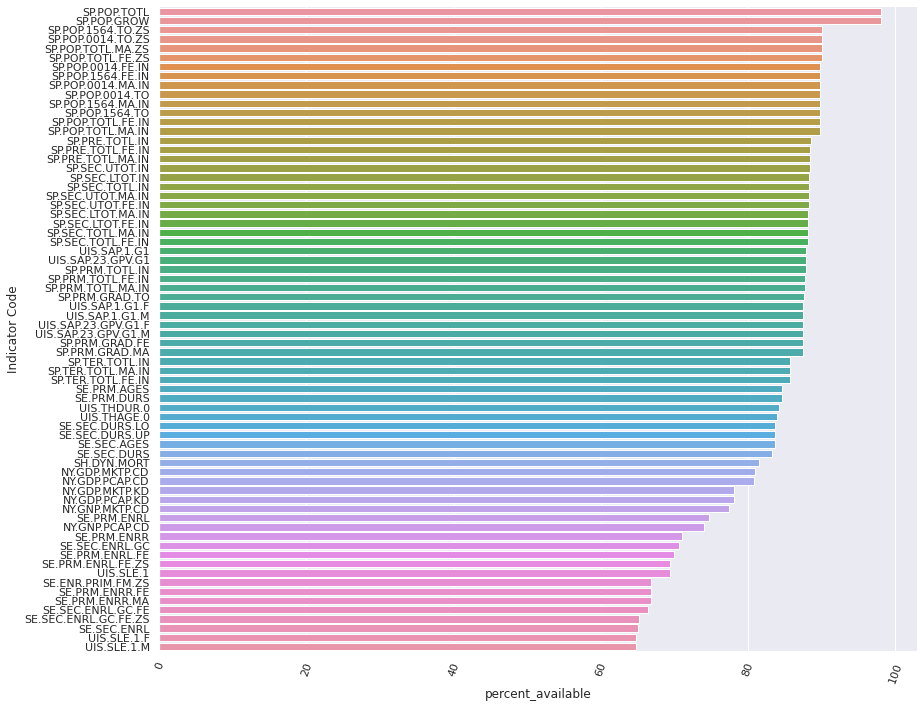

In [36]:
plot_df_xy(values_top_data_2, 'percent_available', 'Indicator Code', 10)

In [65]:
# describe de ces kpi
# plot value vs time pour chaque kpi
# sélectionner ceux qui semblent cohérents par rapport à ce que l'on voit

pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = None
values_indicator_2 = values_top_data_2.join(top_data_2[['Indicator Code', 'Indicator Name']].set_index('Indicator Code'), on='Indicator Code', how = 'right')
val_indic_desc = values_indicator_2.drop_duplicates(subset = ['Indicator Code'], keep = 'first').sort_values(by='percent_available',ascending=False)
val_indic_desc.reset_index(drop=True, inplace=True)
val_indic_desc

Indicator Code  percent_available  \
0            SP.POP.TOTL              98.07   
1            SP.POP.GROW              98.02   
2      SP.POP.1564.TO.ZS              90.06   
3      SP.POP.0014.TO.ZS              89.97   
4      SP.POP.TOTL.MA.ZS              89.97   
5      SP.POP.TOTL.FE.ZS              89.97   
6      SP.POP.0014.FE.IN              89.70   
7      SP.POP.1564.FE.IN              89.70   
8      SP.POP.0014.MA.IN              89.70   
9         SP.POP.0014.TO              89.70   
10     SP.POP.1564.MA.IN              89.70   
11        SP.POP.1564.TO              89.70   
12     SP.POP.TOTL.FE.IN              89.70   
13     SP.POP.TOTL.MA.IN              89.70   
14        SP.PRE.TOTL.IN              88.48   
15     SP.PRE.TOTL.FE.IN              88.35   
16     SP.PRE.TOTL.MA.IN              88.35   
17        SP.SEC.UTOT.IN              88.34   
18        SP.SEC.LTOT.IN              88.32   
19        SP.SEC.TOTL.IN              88.30   
20     SP.SEC.UTOT.MA.IN              88.21   
21     SP.SEC.UTOT.FE.IN              88.21   
22     SP.SEC.LTOT.MA.IN              88.19   
23     SP.SEC.LTOT.FE.IN              88.19   
24     SP.SEC.TOTL.MA.IN              88.17   
25     SP.SEC.TOTL.FE.IN              88.17   
26          UIS.SAP.1.G1              87.92   
27     UIS.SAP.23.GPV.G1              87.90   
28        SP.PRM.TOTL.IN              87.89   
29     SP.PRM.TOTL.FE.IN              87.77   
30     SP.PRM.TOTL.MA.IN              87.77   
31        SP.PRM.GRAD.TO              87.52   
32        UIS.SAP.1.G1.F              87.51   
33        UIS.SAP.1.G1.M              87.51   
34   UIS.SAP.23.GPV.G1.F              87.49   
35   UIS.SAP.23.GPV.G1.M              87.49   
36        SP.PRM.GRAD.FE              87.40   
37        SP.PRM.GRAD.MA              87.40   
38        SP.TER.TOTL.IN              85.75   
39     SP.TER.TOTL.MA.IN              85.63   
40     SP.TER.TOTL.FE.IN              85.63   
41           SE.PRM.AGES              84.66   
42           SE.PRM.DURS              84.66   
43           UIS.THDUR.0              84.21   
44           UIS.THAGE.0              83.90   
45        SE.SEC.DURS.LO              83.62   
46        SE.SEC.DURS.UP              83.62   
47           SE.SEC.AGES              83.62   
48           SE.SEC.DURS              83.18   
49           SH.DYN.MORT              81.54   
50        NY.GDP.MKTP.CD              80.88   
51        NY.GDP.PCAP.CD              80.85   
52        NY.GDP.MKTP.KD              78.10   
53        NY.GDP.PCAP.KD              78.07   
54        NY.GNP.MKTP.CD              77.37   
55           SE.PRM.ENRL              74.73   
56        NY.GNP.PCAP.CD              74.00   
57           SE.PRM.ENRR              71.07   
58        SE.SEC.ENRL.GC              70.55   
59        SE.PRM.ENRL.FE              69.87   
60     SE.PRM.ENRL.FE.ZS              69.34   
61             UIS.SLE.1              69.32   
62     SE.ENR.PRIM.FM.ZS              66.83   
63        SE.PRM.ENRR.FE              66.79   
64        SE.PRM.ENRR.MA              66.79   
65     SE.SEC.ENRL.GC.FE              66.35   
66  SE.SEC.ENRL.GC.FE.ZS              65.16   
67           SE.SEC.ENRL              65.10   
68           UIS.SLE.1.F              64.71   
69           UIS.SLE.1.M              64.71   

                                                                                 Indicator Name  
0                                                                             Population, total  
1                                                                  Population growth (annual %)  
2                                                           Population, ages 15-64 (% of total)  
3                                                            Population, ages 0-14 (% of total)  
4                                                                 Population, male (% of total)  
5                                                               Population, female (

In [61]:
# cherrypick indicators regarding their value towards current business questions
## reminder criterias :
## find countries with high "market potential" for distance learning
## be able to figure out the evolution of the "market potential" for each country
## find which (1) country the company should focus on first


## for money income, the income group from data['Country'] should be enough
## => we can remove most income / GDP related data from indicators in data['Data']
country2.groupby(['Income Group']).count()[['Country Code']]

Country Code
Income Group                      
High income: OECD               31
High income: nonOECD            44
Low income                      34
Lower middle income             50
Upper middle income             55

In [66]:
#country2high = country2.loc[country2['Income Group'].str.contains('High', na=False)]
country2high = country2.loc[country2['Income Group'] == 'High income: OECD']
country2high

Country Code       Short Name       Income Group  \
0           AUS        Australia  High income: OECD   
1           AUT          Austria  High income: OECD   
2           BEL          Belgium  High income: OECD   
3           CAN           Canada  High income: OECD   
4           CHE      Switzerland  High income: OECD   
5           CHL            Chile  High income: OECD   
6           CZE   Czech Republic  High income: OECD   
7           DEU          Germany  High income: OECD   
8           DNK          Denmark  High income: OECD   
9           ESP            Spain  High income: OECD   
10          EST          Estonia  High income: OECD   
11          FIN          Finland  High income: OECD   
12          FRA           France  High income: OECD   
13          GBR   United Kingdom  High income: OECD   
14          GRC           Greece  High income: OECD   
15          IRL          Ireland  High income: OECD   
16          ISL          Iceland  High income: OECD   
17          ISR           Israel  High income: OECD   
18          ITA            Italy  High income: OECD   
19          JPN            Japan  High income: OECD   
20          KOR            Korea  High income: OECD   
21          LUX       Luxembourg  High income: OECD   
22          NLD      Netherlands  High income: OECD   
23          NOR           Norway  High income: OECD   
24          NZL      New Zealand  High income: OECD   
25          POL           Poland  High income: OECD   
26          PRT         Portugal  High income: OECD   
27          SVK  Slovak Republic  High income: OECD   
28          SVN         Slovenia  High income: OECD   
29          SWE           Sweden  High income: OECD   
30          USA    United States  High income: OECD   

                        Region  
0          East Asia & Pacific  
1        Europe & Central Asia  
2        Europe & Central Asia  
3                North America  
4        Europe & Central Asia  
5    Latin America & Caribbean  
6        Europe & Central Asia  
7        Europe & Central Asia  
8        Europe & Central Asia  
9        Europe & Central Asia  
10       Europe & Central Asia  
11       Europe & Central Asia  
12       Europe & Central Asia  
13       Europe & Central Asia  
14       Europe & Central Asia  
15       Europe & Central Asia  
16       Europe & Central Asia  
17  Middle East & North Africa  
18       Europe & Central Asia  
19         East Asia & Pacific  
20         East Asia & Pacific  
21       Europe & Central Asia  
22       Europe & Central Asia  
23       Europe & Central Asia  
24         East Asia & Pacific  
25       Europe & Central Asia  
26       Europe & Central Asia  
27       Europe & Central Asia  
28       Europe & Central Asia  
29       Europe & Central Asia  
30               North America

In [68]:
country2high.groupby(['Income Group']).count()[['Country Code']]

Country Code
Income Group                   
High income: OECD            31

In [42]:
high_inc_data = data['Data'].loc[data['Data']['Country Code'].isin(country2high['Country Code'])]

In [69]:
high_inc_available_count = get_df_avalaible_values(high_inc_data).sort_values(by='percent_available',ascending=False)
high_inc_available_count.reset_index(drop=True, inplace=True)
high_inc_available_count

Indicator Code  percent_available
0                  SP.SEC.TOTL.MA.IN              71.21
1                  SP.POP.TOTL.FE.IN              71.21
2                  SP.POP.0014.TO.ZS              71.21
3                     SP.SEC.TOTL.IN              71.21
4                  SP.SEC.TOTL.FE.IN              71.21
5                        SE.PRM.AGES              71.21
6                  SP.POP.TOTL.MA.ZS              71.21
7                        SE.SEC.AGES              71.21
8                     SP.PRE.TOTL.IN              71.21
9                  SP.POP.TOTL.FE.ZS              71.21
10                 SP.POP.0014.MA.IN              71.21
11                    SP.SEC.LTOT.IN              71.21
12                 SP.POP.TOTL.MA.IN              71.21
13                 SP.SEC.LTOT.FE.IN              71.21
14                 SP.SEC.UTOT.MA.IN              71.21
15                 SP.SEC.UTOT.FE.IN              71.21
16                 SP.SEC.LTOT.MA.IN              71.21
17                    SP.SEC.UTOT.IN              71.21
18                 SP.POP.0014.FE.IN              71.21
19                       SP.POP.TOTL              71.21
20                    SE.SEC.DURS.LO              71.21
21                 SP.PRE.TOTL.FE.IN              71.21
22                    SE.SEC.DURS.UP              71.21
23                 SP.PRM.TOTL.FE.IN              71.21
24                       UIS.THDUR.0              71.21
25                    SP.POP.1564.TO              71.21
26                 SP.POP.1564.MA.IN              71.21
27                    SP.PRM.TOTL.IN              71.21
28                 SP.POP.1564.FE.IN              71.21
29                 SP.PRE.TOTL.MA.IN              71.21
30                       SE.PRM.DURS              71.21
31                       SE.SEC.DURS              71.21
32                 SP.POP.1564.TO.ZS              71.21
33                    SP.POP.0014.TO              71.21
34                 SP.PRM.TOTL.MA.IN              71.21
35                       UIS.THAGE.0              71.16
36                       SP.POP.GROW              71.16
37                    UIS.SAP.1.G1.M              71.11
38                      UIS.SAP.1.G1              71.11
39                 UIS.SAP.23.GPV.G1              71.11
40               UIS.SAP.23.GPV.G1.F              71.11
41               UIS.SAP.23.GPV.G1.M              71.11
42                    UIS.SAP.1.G1.F              71.11
43                    SP.PRM.GRAD.FE              70.19
44                    SP.PRM.GRAD.TO              70.19
45                    SP.PRM.GRAD.MA              70.19
46                 SP.TER.TOTL.MA.IN              69.16
47                 SP.TER.TOTL.FE.IN              69.16
48                    SP.TER.TOTL.IN              69.16
49                       SH.DYN.MORT              68.91
50                    NY.GDP.MKTP.CD              65.30
51                    NY.GDP.PCAP.CD              65.30
52                    NY.GNP.MKTP.CD              65.20
53                    NY.GDP.MKTP.KD              64.91
54                    NY.GDP.PCAP.KD              64.91
55                    NY.GNP.PCAP.CD              63.83
56                       SE.PRM.ENRL              62.95
57                       SE.PRM.ENRR              62.95
58                         UIS.SLE.1              61.39
59                    SE.SEC.ENRL.GC              60.75
60                       SE.TER.ENRL              60.12
61                    SE.PRM.ENRL.FE              60.07
62                    SE.PRM.ENRR.MA              60.07
63                 SE.ENR.PRIM.FM.ZS              60.07
64                 SE.PRM.ENRL.FE.ZS              60.07
65                    SE.PRM.ENRR.FE              60.07
66                       SE.TER.ENRR              60.02
67                       SE.SEC.ENRL              59.97
68                       SE.SEC.ENRR              59.97
69                  UIS.TE_100000.56              58.75
70                        UIS.SLE.56          

In [44]:
high_inc_available_count.head(200)

Indicator Code  percent_available
2325     SP.SEC.TOTL.MA.IN              71.21
2529     SP.POP.TOTL.FE.IN              71.21
2419     SP.POP.0014.TO.ZS              71.21
2323        SP.SEC.TOTL.IN              71.21
2324     SP.SEC.TOTL.FE.IN              71.21
1684           SE.PRM.AGES              71.21
2532     SP.POP.TOTL.MA.ZS              71.21
1681           SE.SEC.AGES              71.21
2317        SP.PRE.TOTL.IN              71.21
2530     SP.POP.TOTL.FE.ZS              71.21
2421     SP.POP.0014.MA.IN              71.21
2311        SP.SEC.LTOT.IN              71.21
2531     SP.POP.TOTL.MA.IN              71.21
2312     SP.SEC.LTOT.FE.IN              71.21
2334     SP.SEC.UTOT.MA.IN              71.21
2333     SP.SEC.UTOT.FE.IN              71.21
2313     SP.SEC.LTOT.MA.IN              71.21
2332        SP.SEC.UTOT.IN              71.21
2420     SP.POP.0014.FE.IN              71.21
2533           SP.POP.TOTL              71.21
2982        SE.SEC.DURS.LO              71.21
2318     SP.PRE.TOTL.FE.IN              71.21
2987        SE.SEC.DURS.UP              71.21
2321     SP.PRM.TOTL.FE.IN              71.21
2984           UIS.THDUR.0              71.21
2486        SP.POP.1564.TO              71.21
2485     SP.POP.1564.MA.IN              71.21
2320        SP.PRM.TOTL.IN              71.21
2484     SP.POP.1564.FE.IN              71.21
2319     SP.PRE.TOTL.MA.IN              71.21
2985           SE.PRM.DURS              71.21
2986           SE.SEC.DURS              71.21
2483     SP.POP.1564.TO.ZS              71.21
2422        SP.POP.0014.TO              71.21
2322     SP.PRM.TOTL.MA.IN              71.21
1683           UIS.THAGE.0              71.16
2307           SP.POP.GROW              71.16
2337        UIS.SAP.1.G1.M              71.11
2335          UIS.SAP.1.G1              71.11
2338     UIS.SAP.23.GPV.G1              71.11
2339   UIS.SAP.23.GPV.G1.F              71.11
2340   UIS.SAP.23.GPV.G1.M              71.11
2336        UIS.SAP.1.G1.F              71.11
2330        SP.PRM.GRAD.FE              70.19
2329        SP.PRM.GRAD.TO              70.19
2331        SP.PRM.GRAD.MA              70.19
2328     SP.TER.TOTL.MA.IN              69.16
2327     SP.TER.TOTL.FE.IN              69.16
2326        SP.TER.TOTL.IN              69.16
1642           SH.DYN.MORT              68.91
1243        NY.GDP.MKTP.CD              65.30
1245        NY.GDP.PCAP.CD              65.30
1250        NY.GNP.MKTP.CD              65.20
1242        NY.GDP.MKTP.KD              64.91
1244        NY.GDP.PCAP.KD              64.91
1251        NY.GNP.PCAP.CD              63.83
1183           SE.PRM.ENRL              62.95
1331           SE.PRM.ENRR              62.95
2931             UIS.SLE.1              61.39
1197        SE.SEC.ENRL.GC              60.75
1204           SE.TER.ENRL              60.12
1184        SE.PRM.ENRL.FE              60.07
1334        SE.PRM.ENRR.MA              60.07
1333     SE.ENR.PRIM.FM.ZS              60.07
2035     SE.PRM.ENRL.FE.ZS              60.07
1332        SE.PRM.ENRR.FE              60.07
1339           SE.TER.ENRR              60.02
1191           SE.SEC.ENRL              59.97
1335           SE.SEC.ENRR              59.97
1201      UIS.TE_100000.56              58.75
2939            UIS.SLE.56              58.65
2932           UIS.SLE.1.F              58.50
2933         UIS.SLE.1.GPI              58.50
2934           UIS.SLE.1.M              58.50
2935            UIS.SLE.23              58.50
2039  SE.SEC.ENRL.GC.FE.ZS              58.26
1198     SE.SEC.ENRL.GC.FE              58.26
1323           UIS.GER.123              57.97
2923           UIS.SLE.123              57.97
1205        SE.TER.ENRL.FE              57.14
2050     SE.TER.ENRL.FE.ZS              57.14
1340        SE.TER.ENRR.FE              57.04
1341     SE.ENR.TERT.FM.ZS              57.04
1342        SE.TER.ENRR.MA              57.04
1199        SE.SEC.ENRL.VO              56.84
1336        SE.SEC.ENRR.FE              56.84
2038     S

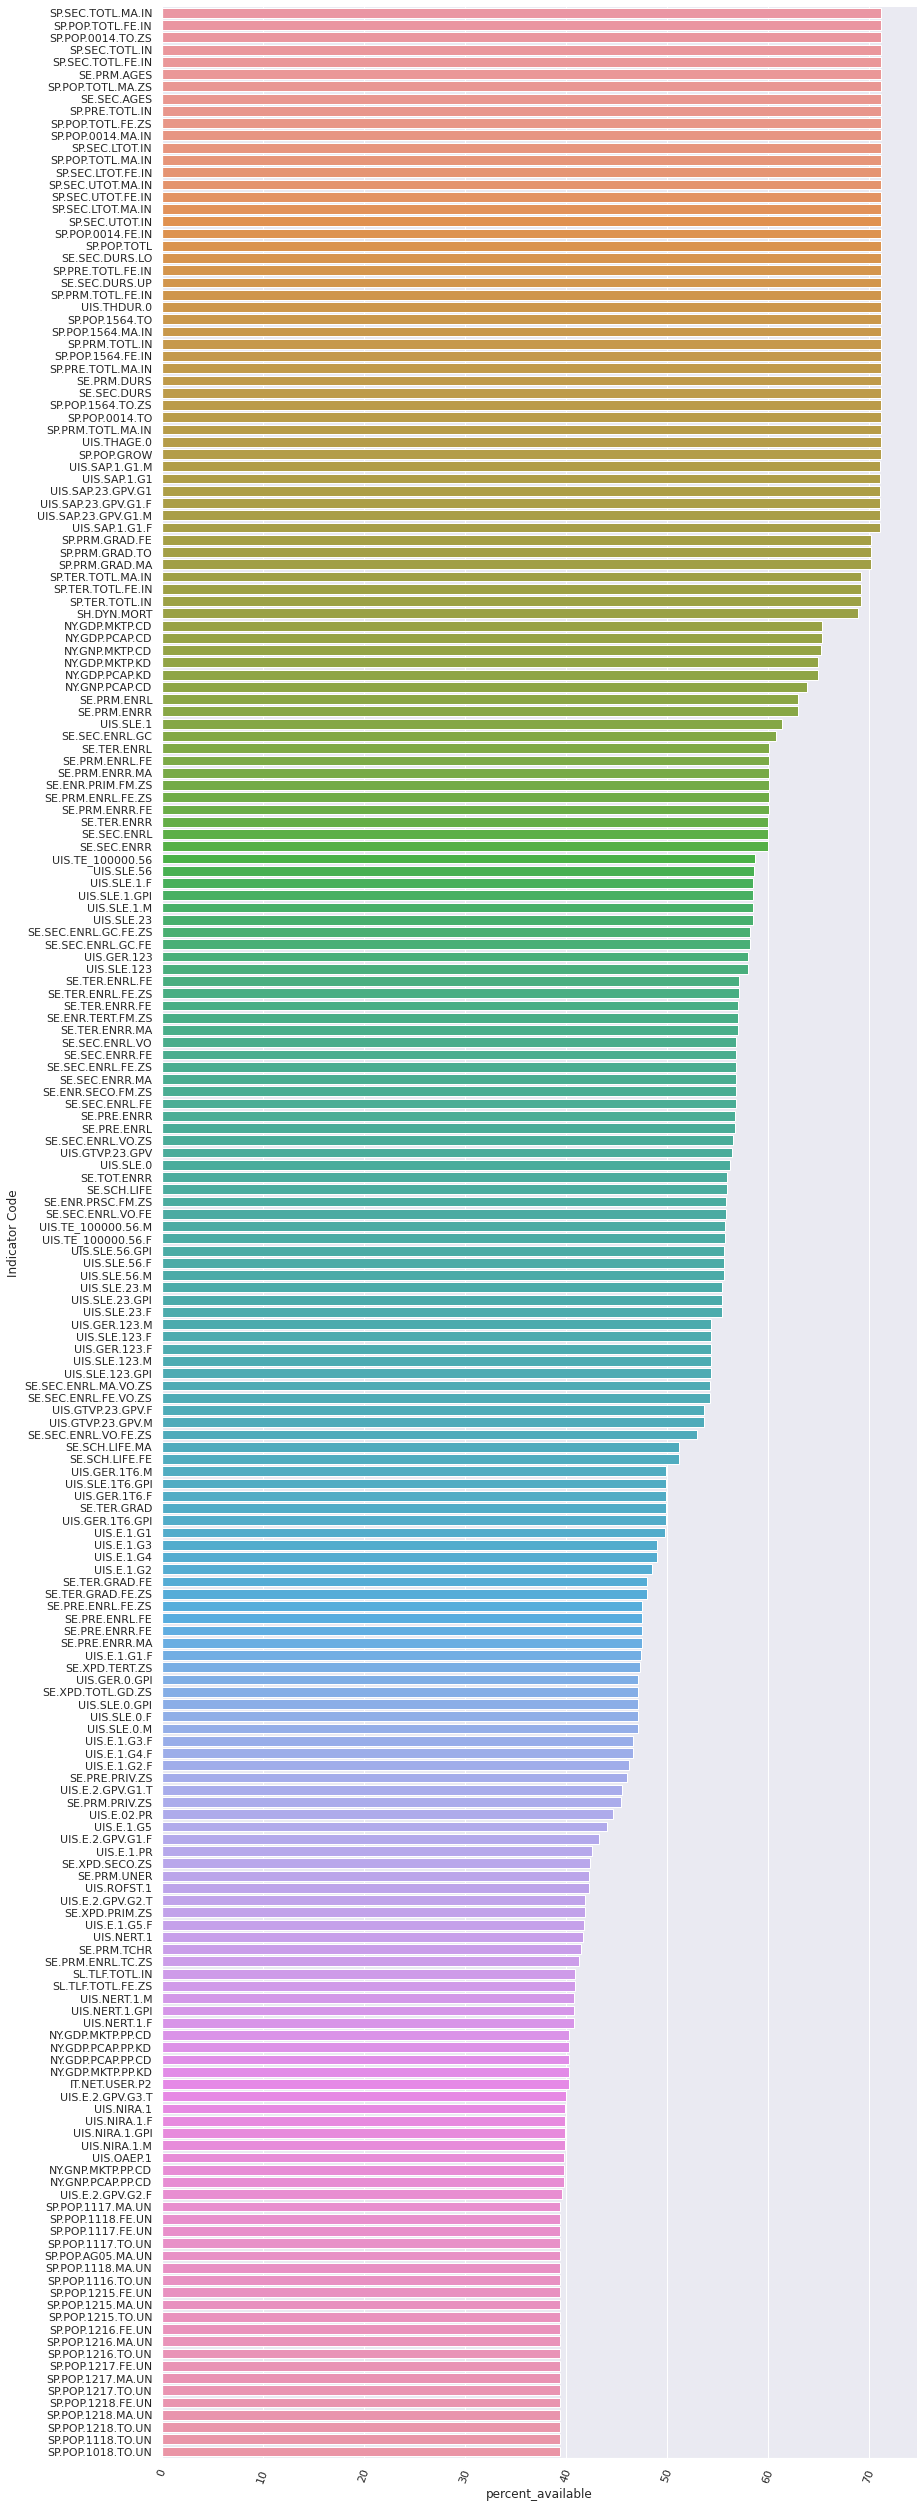

In [71]:
plot_df_xy(high_inc_available_count.head(200), 'percent_available', 'Indicator Code', 35, 13)

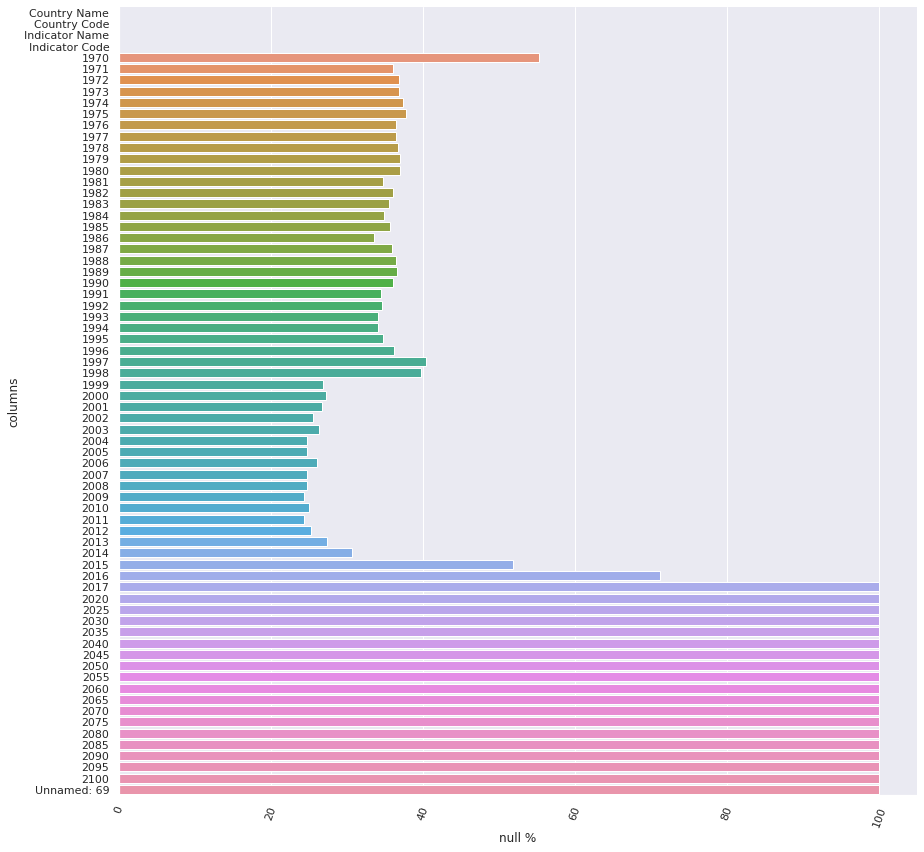

In [46]:
high_inc_results_top = high_inc_available_count.loc[high_inc_available_count['percent_available'] > 45].sort_values(by='percent_available',ascending=False)
high_inc_results_top_col = [high_inc_results_top['Indicator Code'].unique()][0]

## obtenir data['Data'] avec uniquement indicateurs filtrés
high_inc_top_data = data['Data'].loc[data['Data']['Indicator Code'].isin(high_inc_results_top_col)]
high_inc_top_data_na = get_df_columns_na(high_inc_top_data)
plot_df_xy(high_inc_top_data_na, 'null %', 'columns', 12)

# Select / Cherrypick indicators


In [75]:
## list cherrypicked_indicators
cherrypicked_indicators = [
    'SP.POP.TOTL',
    'SP.POP.GROW',
    'SP.SEC.TOTL.IN',
    'SE.SEC.DURS',
    'SE.SEC.ENRL',
    'SP.TER.TOTL.IN',
    ''
    ]
## check descriptions of listed indicators
val_indic_desc.loc[~val_indic_desc['Indicator Code'].isin(cherrypicked_indicators)]

Indicator Code  percent_available  \
0            SP.POP.TOTL              98.07   
2      SP.POP.1564.TO.ZS              90.06   
3      SP.POP.0014.TO.ZS              89.97   
4      SP.POP.TOTL.MA.ZS              89.97   
5      SP.POP.TOTL.FE.ZS              89.97   
6      SP.POP.0014.FE.IN              89.70   
7      SP.POP.1564.FE.IN              89.70   
8      SP.POP.0014.MA.IN              89.70   
9         SP.POP.0014.TO              89.70   
10     SP.POP.1564.MA.IN              89.70   
11        SP.POP.1564.TO              89.70   
12     SP.POP.TOTL.FE.IN              89.70   
13     SP.POP.TOTL.MA.IN              89.70   
14        SP.PRE.TOTL.IN              88.48   
15     SP.PRE.TOTL.FE.IN              88.35   
16     SP.PRE.TOTL.MA.IN              88.35   
17        SP.SEC.UTOT.IN              88.34   
18        SP.SEC.LTOT.IN              88.32   
20     SP.SEC.UTOT.MA.IN              88.21   
21     SP.SEC.UTOT.FE.IN              88.21   
22     SP.SEC.LTOT.MA.IN              88.19   
23     SP.SEC.LTOT.FE.IN              88.19   
24     SP.SEC.TOTL.MA.IN              88.17   
25     SP.SEC.TOTL.FE.IN              88.17   
26          UIS.SAP.1.G1              87.92   
27     UIS.SAP.23.GPV.G1              87.90   
28        SP.PRM.TOTL.IN              87.89   
29     SP.PRM.TOTL.FE.IN              87.77   
30     SP.PRM.TOTL.MA.IN              87.77   
31        SP.PRM.GRAD.TO              87.52   
32        UIS.SAP.1.G1.F              87.51   
33        UIS.SAP.1.G1.M              87.51   
34   UIS.SAP.23.GPV.G1.F              87.49   
35   UIS.SAP.23.GPV.G1.M              87.49   
36        SP.PRM.GRAD.FE              87.40   
37        SP.PRM.GRAD.MA              87.40   
38        SP.TER.TOTL.IN              85.75   
39     SP.TER.TOTL.MA.IN              85.63   
40     SP.TER.TOTL.FE.IN              85.63   
41           SE.PRM.AGES              84.66   
42           SE.PRM.DURS              84.66   
43           UIS.THDUR.0              84.21   
44           UIS.THAGE.0              83.90   
45        SE.SEC.DURS.LO              83.62   
46        SE.SEC.DURS.UP              83.62   
47           SE.SEC.AGES              83.62   
49           SH.DYN.MORT              81.54   
50        NY.GDP.MKTP.CD              80.88   
51        NY.GDP.PCAP.CD              80.85   
52        NY.GDP.MKTP.KD              78.10   
53        NY.GDP.PCAP.KD              78.07   
54        NY.GNP.MKTP.CD              77.37   
55           SE.PRM.ENRL              74.73   
56        NY.GNP.PCAP.CD              74.00   
57           SE.PRM.ENRR              71.07   
58        SE.SEC.ENRL.GC              70.55   
59        SE.PRM.ENRL.FE              69.87   
60     SE.PRM.ENRL.FE.ZS              69.34   
61             UIS.SLE.1              69.32   
62     SE.ENR.PRIM.FM.ZS              66.83   
63        SE.PRM.ENRR.FE              66.79   
64        SE.PRM.ENRR.MA              66.79   
65     SE.SEC.ENRL.GC.FE              66.35   
66  SE.SEC.ENRL.GC.FE.ZS              65.16   
67           SE.SEC.ENRL              65.10   
68           UIS.SLE.1.F              64.71   
69           UIS.SLE.1.M              64.71   

                                                                                 Indicator Name  
0                                                                             Population, total  
2                                                           Population, ages 15-64 (% of total)  
3                                                            Population, ages 0-14 (% of total)  
4                                                                 Population, male (% of total)  
5                                                               Population, female (% of total)  
6                                                                 Population, ages 0-14, female  
7                                                                Population, ages 15-64, female  
8                            

In [48]:
## check if some previously cherrypicked indicators have enough available data
cherry_indics = ['SE.TER.ENRR', 'SE.TER.ENRR', 'SE.SCH.LIFE', 'UIS.XSPENDP.23.FDPUB.FNS', 'UIS.XSPENDP.56.FDPUB.FNS', 'UIS.XGDP.56.FSGOV']
top_200_results.loc[top_200_results['Indicator Code'].isin(cherry_indics)]


NameError: name 'top_200_results' is not defined

In [ ]:
##check similarly for all results

result.loc[result['Indicator Code'].isin(cherry_indics)]

# Aggregate numerical data

In [ ]:
## Aggregate to obtain following shape / columns :
##
## country name | country code | indicator code | moyenne | mediane | nan count | nan % / standard deviation

In [ ]:
## sélectionner top 10

## pour chacune des variables, regarder la distribution des valeurs (violin chart)
## => regarder si il y a des valeurs spécifiques (distribution extreme ou non, etc)

## regarder si certaines sont corrélées : étude de corrélation, matrice de corrélation
## => https://www.kdnuggets.com/2019/07/annotated-heatmaps-correlation-matrix.html

## essayer de déterminer pays/endroits où la tendance n'a pas été à 
##        la hausse mais que des indicateurs diraient que cela pourrait aller à la hausse


## faire infos type "describe()" sur les kpi

## plotter en violin


## (ACP) / PCA https://www.google.com/search?q=pca+data


## zones géo